
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [1]:
#Step 1 : Import and explore the framingham.csv dataset.

import zipfile
import pandas as pd
zip_path = r'C:\Users\srila\Downloads\downloaded-file.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  
    
csv_path = 'extracted_data/framingham.csv'
df = pd.read_csv(csv_path)

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#Step 2 : Clean the data (handle nulls, correct formats, etc.).

import pandas as pd
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

df = df.fillna(df.mean(numeric_only=True))


print("\nData types after filling missing values:\n", df.dtypes)

print("\nCheck for negative or incorrect values in 'age':")
print(df[df['age'] < 0])  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None

Missing

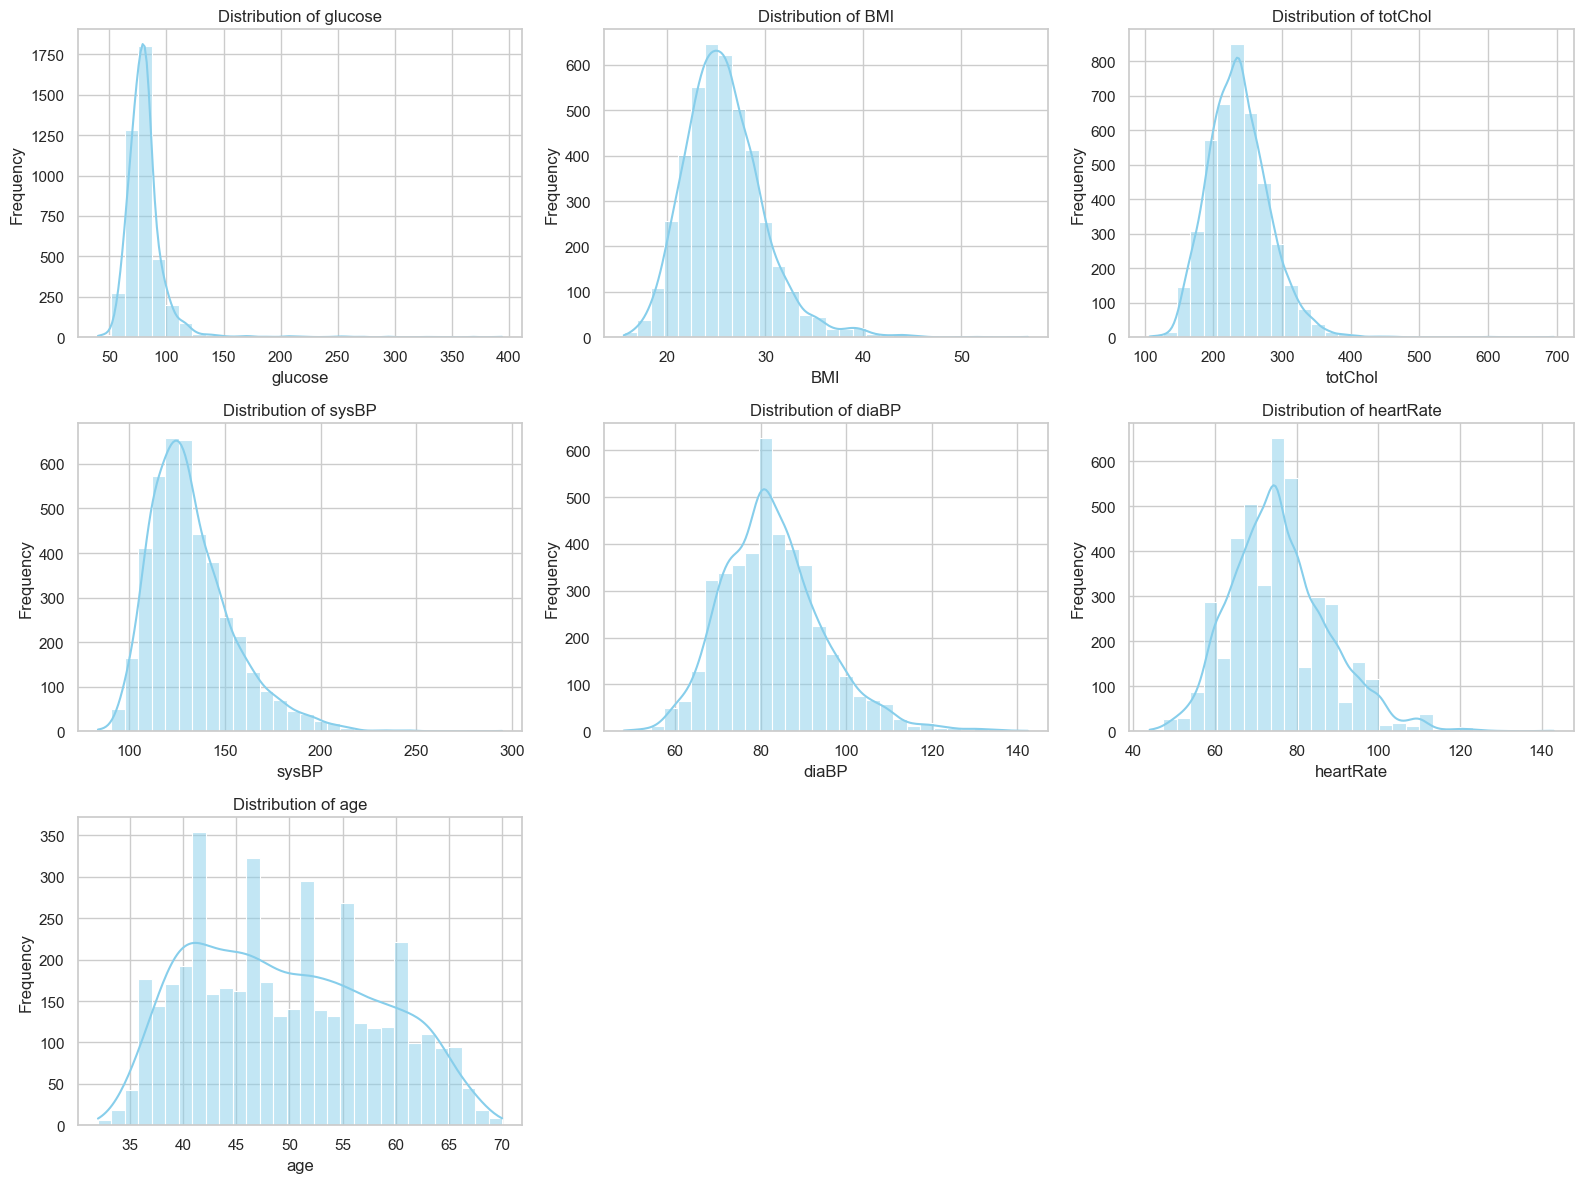

In [5]:
#Step 3 : Visualize the distribution of glucose and related health indicators.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.fillna(df.mean(numeric_only=True))

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

columns = ['glucose', 'BMI', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'age']

for i, col in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



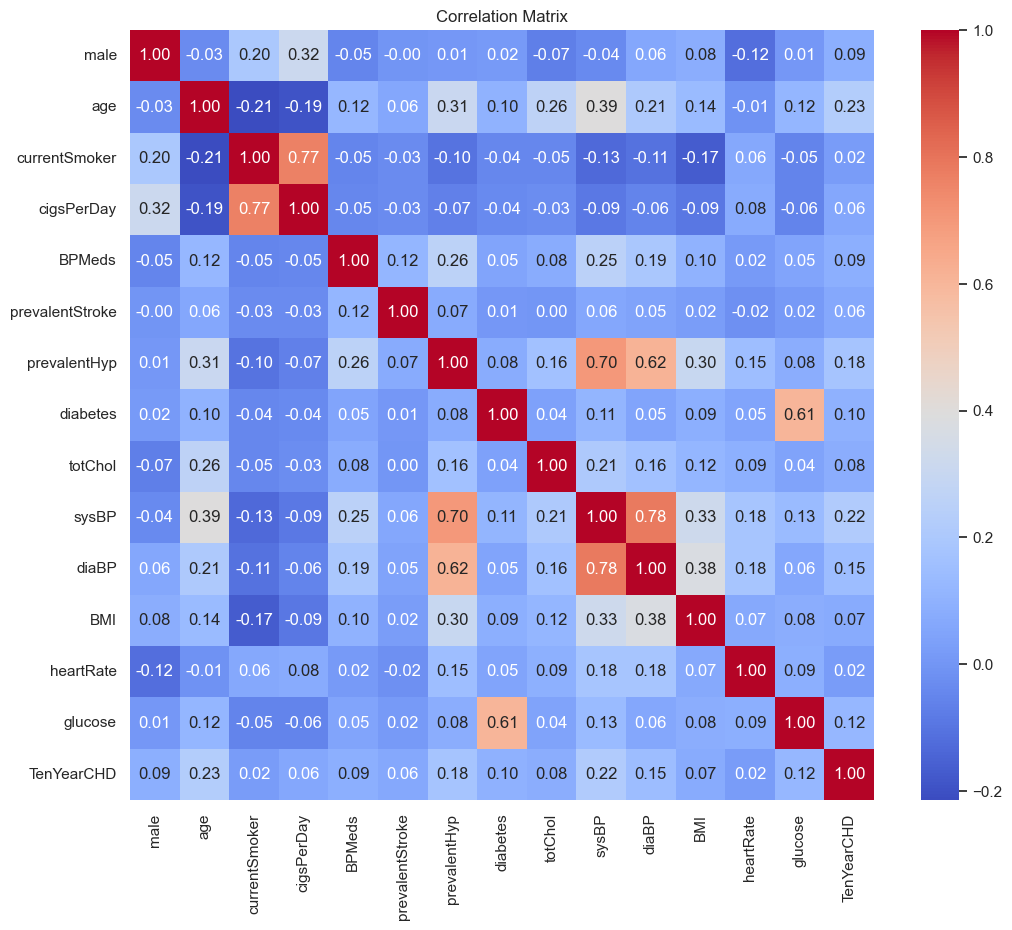

In [8]:
#Step 4 : Perform feature selection and engineering.
#Target variable: TenYearCHD

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df.fillna(df.mean(numeric_only=True))

if 'education' in df.columns:
    df = df.drop('education', axis=1)

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

df['pulse_pressure'] = df['sysBP'] - df['diaBP']
df['bmi_age_ratio'] = df['BMI'] / df['age']

if df['male'].dtype == 'object':
    df['male'] = df['male'].map({'Yes': 1, 'No': 0})

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


In [12]:
#Step 5 : Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
#Target variable: TenYearCHD

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = df.fillna(df.mean(numeric_only=True))

if 'education' in df.columns:
    df = df.drop('education', axis=1)

df['pulse_pressure'] = df['sysBP'] - df['diaBP']
df['bmi_age_ratio'] = df['BMI'] / df['age']

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Logistic Regression Accuracy: 0.8573113207547169
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.56      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.71      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

Decision Tree Accuracy: 0.7488207547169812
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       725
           1       0.16      0.17      0.16       123

    accuracy                           0.75       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.76      0.75      0.75       848

Random Forest Accuracy: 0.8537735849056604
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.47      0.06      0.10       123

    accuracy                           0.85    


Logistic Regression
Accuracy: 0.8573113207547169
Precision: 0.5625
Recall: 0.07317073170731707
F1 Score: 0.12949640287769784
ROC AUC Score: 0.7114998598261845
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.56      0.07      0.13       123

    accuracy                           0.86       848
   macro avg       0.71      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



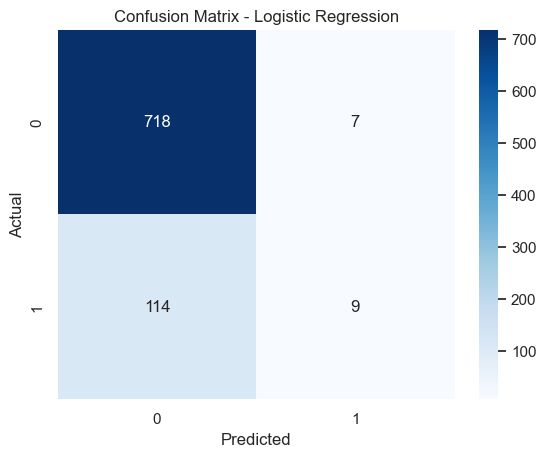


Decision Tree
Accuracy: 0.7488207547169812
Precision: 0.1590909090909091
Recall: 0.17073170731707318
F1 Score: 0.16470588235294117
ROC AUC Score: 0.5088141295206055
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       725
           1       0.16      0.17      0.16       123

    accuracy                           0.75       848
   macro avg       0.51      0.51      0.51       848
weighted avg       0.76      0.75      0.75       848



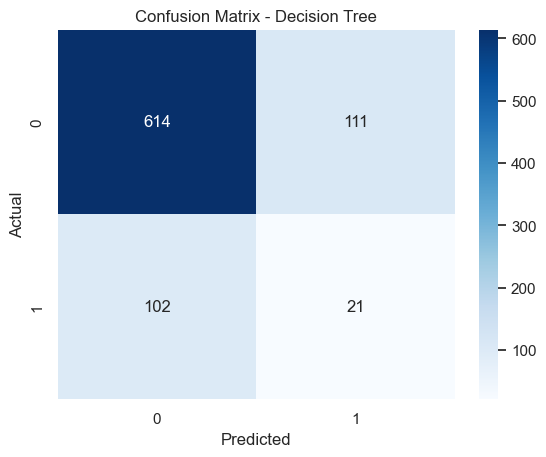


Random Forest
Accuracy: 0.8537735849056604
Precision: 0.4666666666666667
Recall: 0.056910569105691054
F1 Score: 0.10144927536231885
ROC AUC Score: 0.682618446874124
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.47      0.06      0.10       123

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.51       848
weighted avg       0.80      0.85      0.80       848



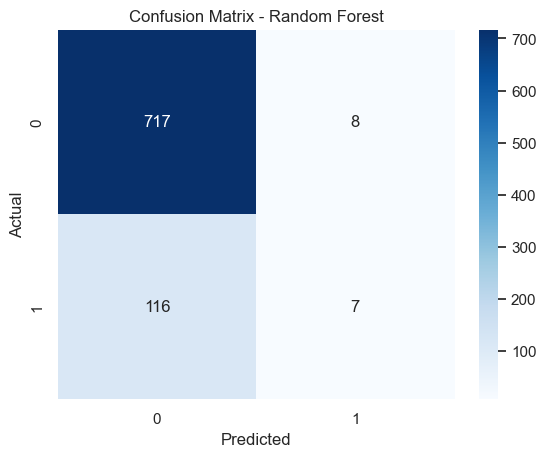

In [13]:
#Step 6 : valuate models using classification metrics.
#Target variable: TenYearCHD

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = df.fillna(df.mean(numeric_only=True))

if 'education' in df.columns:
    df = df.drop('education', axis=1)

df['pulse_pressure'] = df['sysBP'] - df['diaBP']
df['bmi_age_ratio'] = df['BMI'] / df['age']

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with scaling
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_proba = dt.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all models
evaluate_model("Logistic Regression", y_test, lr_pred, lr_proba)
evaluate_model("Decision Tree", y_test, dt_pred, dt_proba)
evaluate_model("Random Forest", y_test, rf_pred, rf_proba)


In [22]:
#Step 7 : Predict glucose levels and draw insights.
#Target variable: glucose

# Check columns of X
print("Feature columns in X:")
print(X.columns)

# Collect user input
user_input = {
    'age': int(input("Age: ")),
    'male': int(input("Male (1) or Female (0): ")),
    'currentSmoker': int(input("Current Smoker (1/0): ")),
    'cigsPerDay': float(input("Cigarettes per Day: ")),
    'BPMeds': int(input("On BP Medication (1/0): ")),
    'prevalentStroke': int(input("History of Stroke (1/0): ")),
    'prevalentHyp': int(input("History of Hypertension (1/0): ")),
    'diabetes': int(input("Has Diabetes (1/0): ")),
    'totChol': float(input("Total Cholesterol: ")),
    'sysBP': float(input("Systolic BP: ")),
    'diaBP': float(input("Diastolic BP: ")),
    'BMI': float(input("BMI: ")),
    'heartRate': float(input("Heart Rate: "))
}

# Calculate additional features
user_input['pulse_pressure'] = user_input['sysBP'] - user_input['diaBP']
user_input['bmi_age_ratio'] = user_input['BMI'] / user_input['age']

# Create DataFrame and reindex
user_df = pd.DataFrame([user_input])
user_df = user_df.reindex(columns=X.columns, fill_value=0)

# Make prediction
predicted_glucose = rf.predict(user_df)[0]
print(f"\nPredicted Glucose Level: {predicted_glucose:.2f} mg/dL")


Feature columns in X:
Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'TenYearCHD', 'pulse_pressure',
       'bmi_age_ratio'],
      dtype='object')


Age:  20
Male (1) or Female (0):  0
Current Smoker (1/0):  1
Cigarettes per Day:  5
On BP Medication (1/0):  0
History of Stroke (1/0):  0
History of Hypertension (1/0):  0
Has Diabetes (1/0):  0
Total Cholesterol:  245
Systolic BP:  125
Diastolic BP:  85
BMI:  31.5
Heart Rate:  78



Predicted Glucose Level: 81.82 mg/dL


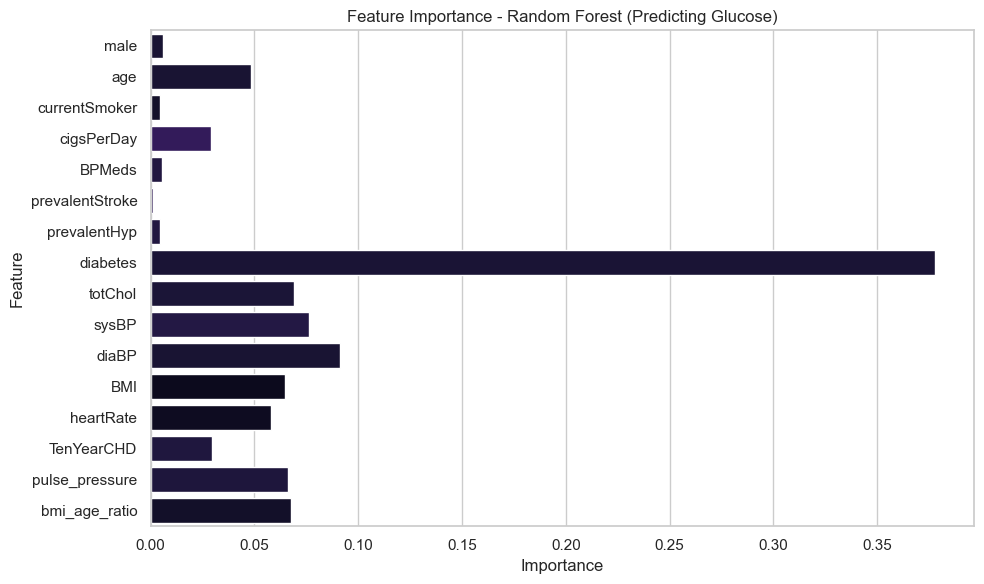

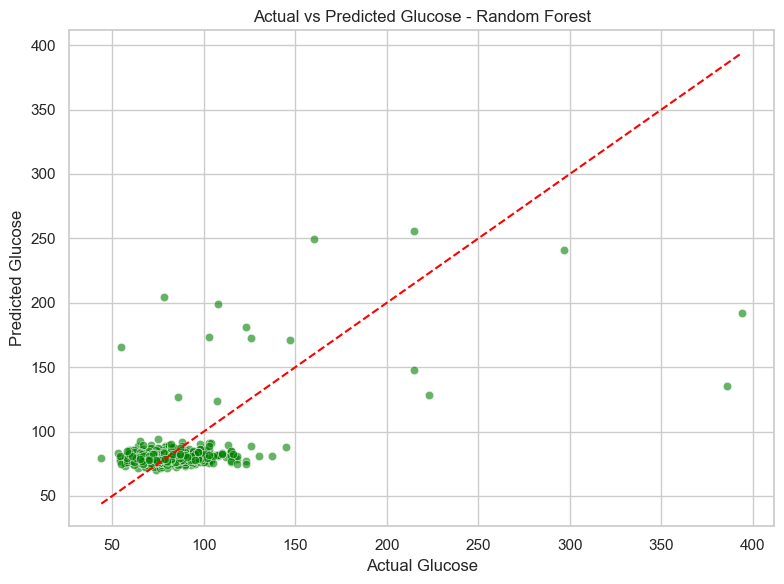

In [18]:
#Step 8 : Visualize the model’s important features and performance.
#Target variable: glucose

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = df.fillna(df.mean(numeric_only=True))

if 'education' in df.columns:
    df = df.drop('education', axis=1)

df['pulse_pressure'] = df['sysBP'] - df['diaBP']
df['bmi_age_ratio'] = df['BMI'] / df['age']


X = df.drop('glucose', axis=1)
y = df['glucose']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#Feature Importance Bar Plot 
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma', hue=N, legend=False)
plt.title("Feature Importance - Random Forest (Predicting Glucose)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs Predicted Glucose - Random Forest")
plt.tight_layout()
plt.show()
